In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# papers
dbDF = pd.read_csv("all132.csv")
dbDF.head()

,ref-type/_name,contributors/authors/author/0,contributors/authors/author/1,contributors/secondary-authors,titles/title,dates/year,dates/pub-dates/date,volume,issue,electronic-resource-num,...,contributors/authors/author/3,contributors/authors/author/4,accession-num,keywords/keyword/6,keywords/keyword/7,urls/related-urls/url,isbn,contributors/authors/author/5,contributors/authors/author/6,keywords/keyword/8
0,Journal Article,"Böttcher, Lucas","Gersbach, Hans",NaN,The great divide: drivers of polarization in t...,2020,12.0,9,1.0,10.1140/EPJDS/S13688-020-00249-4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Journal Article,"Vraga, Emily",NaN,NaN,Party differences in political content on soci...,2016,NaN,40,5.0,10.1108/OIR-10-2015-0345,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Journal Article,"Kaye, Barbara K.","Johnson, Thomas J.",NaN,From here to obscurity?: Media substitution th...,2003,2.0,54,3.0,10.1002/ASI.10212,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Journal Article,"Hashemi, Mahdi",NaN,NaN,A data-driven framework for coding the intent ...,2021,NaN,12,4.0,10.3390/INFO12040148,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Journal Article,"Blankenship, Benjamin T.","Frederick, Jennifer K.",NaN,Privilege and Marginality: How Group Identific...,2017,12.0,17,1.0,10.1111/ASAP.12132,...,"Stewart, Abigail J.","Montgomery, Samantha",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
yearDF = dbDF.groupby("dates/year")["dates/year"].count()
print((yearDF))

dates/year
1999     1
2003     2
2005     2
2006     3
2008     1
2009     1
2010     2
2011     3
2012     3
2013     4
2014     4
2015     3
2016    10
2017    13
2018    13
2019    16
2020    22
2021    21
2022     8
Name: dates/year, dtype: int64


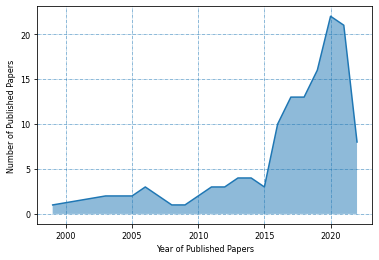

In [4]:
# year plot

xx = sorted(np.unique(dbDF["dates/year"]))
yy = np.array(yearDF)

fig = plt.figure(figsize=(6, 4))
ax1 = fig.add_subplot(111)
ax1.plot(xx,yy)
ax1.grid(color='C0', which='both', linestyle='-.', linewidth=0.5)
ax1.fill_between(xx, yy, alpha=0.5)

ax1.set_xlabel("Year of Published Papers", fontsize=8)
ax1.set_ylabel("Number of Published Papers", fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

fig.savefig('./figs/YearVsPapers173.png', dpi=200, bbox_inches='tight')
plt.show()

# Word Cloud

In [5]:
# word cloud
import nltk
# importing all necessary modules
from wordcloud import WordCloud #, STOPWORDS
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk_stopwords = set(stopwords.words("english"))
nltk_stopwords.update(["arxiv", "jstor"])
# nltk_stopwords.update(["said", "now", "like", "also", "would", "year", "new", "one"])

def get_wordcloud(df):
    comment_words = ''
#     stopwords = set(STOPWORDS)
    stopwords = set(nltk_stopwords)

    # iterate through the csv file
    for val in df.articles:

        # typecaste each val to string
        val = str(val)

        # split the value
        tokens = val.split()

        # Converts each token into lowercase
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()

        comment_words += " ".join(tokens)+" "

    wordcloud = WordCloud(background_color ='white',
                    stopwords = stopwords,
                    collocations=False,
                    min_font_size = 10).generate(comment_words)
    
    return wordcloud

[nltk_data] Downloading package stopwords to /home/ravi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
# plot the WordCloud image         
dbDF = pd.read_csv("extreme_25.csv")
dbDF.articles = dbDF['titles/title']
# print(textALL)

/tmp/ipykernel_2190396/531974366.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  dbDF.articles = dbDF['titles/title']


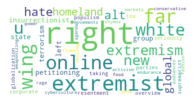

In [38]:
lib_wordcloud = get_wordcloud(dbDF)

plt.figure(figsize = (2.5, 1.5), facecolor = None)
plt.imshow(lib_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad = 0)

plt.savefig('./figs/export_25_extreme.png', dpi=200, bbox_inches='tight')
plt.show()